# Importing Libraries

In [271]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Importing Data & inspecting the Dataframe

In [272]:
DataFrame = pd.read_csv("Marry_div.csv")
DataFrame

,Year,marriage(country),divorce(country),marriage(city),divorce(city),marriage(village),divorce(village)
0,1358,302667,21170,173963,15445,128704,5725
1,1359,337119,23987,196029,19293,141090,4694
2,1360,294499,24423,183546,20449,110953,3974
3,1361,353944,31221,215077,25773,138867,5448
4,1362,410799,35867,259433,30808,151366,5059
5,1363,384876,35178,247253,29047,137623,6131
6,1364,408282,38983,263883,31869,144399,7114
7,1365,340342,35211,225011,29379,115331,5832
8,1366,346652,33433,225566,27588,121086,5845
9,1367,361945,33114,239095,26893,122850,6221


# Two parameters of "Year" is corrupted. Fixing it! 

In [273]:
DataFrame.iloc[38:40,0]  

38    1396(2)
39    1397(2)
Name: Year, dtype: object

In [274]:
DataFrame.iloc[38,0] = '1396'
DataFrame.iloc[39,0] = '1397'
DataFrame.set_index('Year',drop=False,inplace=True)
DataFrame[38:40]

,Year,marriage(country),divorce(country),marriage(city),divorce(city),marriage(village),divorce(village)
Year,,,,,,,
1396,1396,608867,179709,542917,168359,65950,11350
1397,1397,550565,175614,486661,164124,63904,11490


# Converting empty area to NAN and counting it

In [275]:
DataFrame = DataFrame.applymap(lambda x: np.nan if isinstance(x, str) and '…' in x else x)
num_missing = DataFrame.isnull().sum().sum()

print(f"Missing values: {num_missing}")

Missing values: 20


In [276]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 1358 to 1399
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               42 non-null     object
 1   marriage(country)  42 non-null     int64 
 2   divorce(country)   42 non-null     int64 
 3   marriage(city)     37 non-null     object
 4   divorce(city)      37 non-null     object
 5   marriage(village)  37 non-null     object
 6   divorce(village)   37 non-null     object
dtypes: int64(2), object(5)
memory usage: 2.6+ KB


# Converting numerical values(str) to int

In [277]:
DataFrame_ratio = pd.DataFrame()
# Replace 'NaN' strings with actual np.nan
DataFrame['marriage(city)'].replace('NaN', np.nan, inplace=True)
DataFrame['divorce(city)'].replace('NaN', np.nan, inplace=True)
DataFrame['marriage(village)'].replace('NaN', np.nan, inplace=True)
DataFrame['divorce(village)'].replace('NaN', np.nan, inplace=True)

# Convert columns to numeric and then to Int64
DataFrame['marriage(city)'] = pd.to_numeric(DataFrame['marriage(city)'], errors='coerce').astype('Int64')
DataFrame['divorce(city)'] = pd.to_numeric(DataFrame['divorce(city)'], errors='coerce').astype('Int64')
DataFrame['marriage(village)'] = pd.to_numeric(DataFrame['marriage(village)'], errors='coerce').astype('Int64')
DataFrame['divorce(village)'] = pd.to_numeric(DataFrame['divorce(village)'], errors='coerce').astype('Int64')

# Calculating the std & mean and correlations (Filling NAN)

In [278]:
DataFrame_ratio["marriage_country/city"] = DataFrame["marriage(country)"]/DataFrame["marriage(city)"]
DataFrame_ratio["marriage_country/village"] = DataFrame["marriage(country)"]/DataFrame["marriage(village)"]
DataFrame_ratio["divorce_country/city"] = DataFrame["divorce(country)"]/DataFrame["divorce(city)"]
DataFrame_ratio["divorce_country/village"] = DataFrame["divorce(country)"]/DataFrame["divorce(village)"]

In [279]:
DataFrame_ratio.describe()

,marriage_country/city,marriage_country/village,divorce_country/city,divorce_country/village
count,37.0,37.0,37.0,37.0
mean,1.377939,4.414065,1.158699,8.513305
std,0.171919,1.966009,0.065363,3.365865
min,1.121473,2.351652,1.067415,3.697817
25%,1.267021,2.946235,1.109078,5.924954
50%,1.358271,3.791183,1.152228,7.569081
75%,1.513813,4.745021,1.203048,10.16773
max,1.739835,9.232252,1.37067,15.833392


<Axes: >

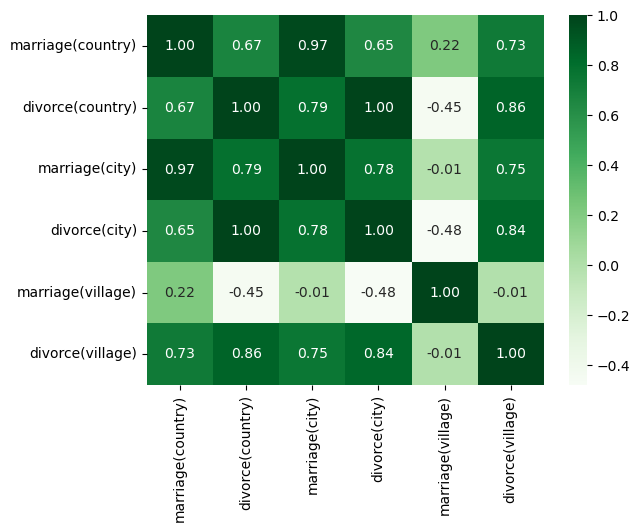

In [280]:
DataFrame.columns
DataFrame_corr = DataFrame[['marriage(country)', 'divorce(country)', 'marriage(city)',
       'divorce(city)', 'marriage(village)', 'divorce(village)']].corr()
sns.heatmap(cmap="Greens",data=DataFrame_corr,annot=True,fmt="0.2f")

# Filling NAN values

The high correlation and low std of "city" stats shows that we can use mean to create an approximate estimation 

So we use mean and predict city, then we use "country - city = village"

The second way could be using an alternative resource

In [281]:
DataFrame['marriage(city)'] = DataFrame['marriage(city)'].fillna((DataFrame['marriage(country)'] / 1.377939).round().astype('Int64'))
DataFrame['divorce(city)'] = DataFrame['divorce(city)'].fillna((DataFrame['divorce(country)'] / 1.158699).round().astype('Int64'))
DataFrame['marriage(village)'] = DataFrame['marriage(village)'].fillna((DataFrame['marriage(country)'] - DataFrame['marriage(city)']).round().astype('Int64'))
DataFrame['divorce(village)'] = DataFrame['divorce(village)'].fillna((DataFrame['divorce(country)'] - DataFrame['divorce(city)']).round().astype('Int64'))
DataFrame

,Year,marriage(country),divorce(country),marriage(city),divorce(city),marriage(village),divorce(village)
Year,,,,,,,
1358,1358,302667,21170,173963,15445,128704,5725
1359,1359,337119,23987,196029,19293,141090,4694
1360,1360,294499,24423,183546,20449,110953,3974
1361,1361,353944,31221,215077,25773,138867,5448
1362,1362,410799,35867,259433,30808,151366,5059
1363,1363,384876,35178,247253,29047,137623,6131
1364,1364,408282,38983,263883,31869,144399,7114
1365,1365,340342,35211,225011,29379,115331,5832
1366,1366,346652,33433,225566,27588,121086,5845


# EDA and Data explorations

### Calculating divorce to marriage rate

In [282]:
DataFrame["Divorce/Marriage"] =  DataFrame["divorce(country)"] / DataFrame["marriage(country)"]  *100
DataFrame[["Divorce/Marriage"]]

,Divorce/Marriage
Year,
1358,6.994486
1359,7.115292
1360,8.293067
1361,8.820887
1362,8.731034
1363,9.140087
1364,9.548057
1365,10.345770
1366,9.644543


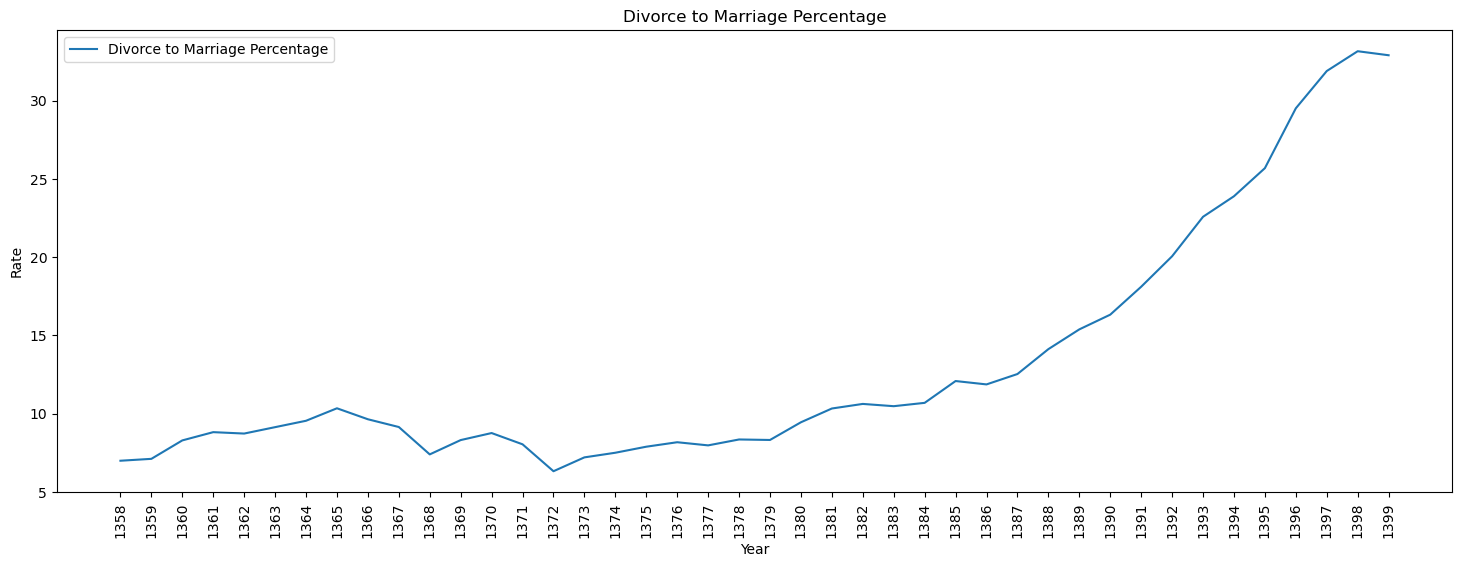

In [290]:
plt.figure(figsize=(18,6))
sns.lineplot(data=DataFrame, x="Year", y="Divorce/Marriage", label="Divorce to Marriage Percentage")
plt.title("Divorce to Marriage Percentage")
plt.xlabel("Year")
plt.ylabel("Rate")
plt.xticks(rotation=90)
plt.show()

The upward trend shows that in 1399 (2020), almost half of the couples divorced. So the question is:

#### The increase in marriage or the divorce?

<hr>

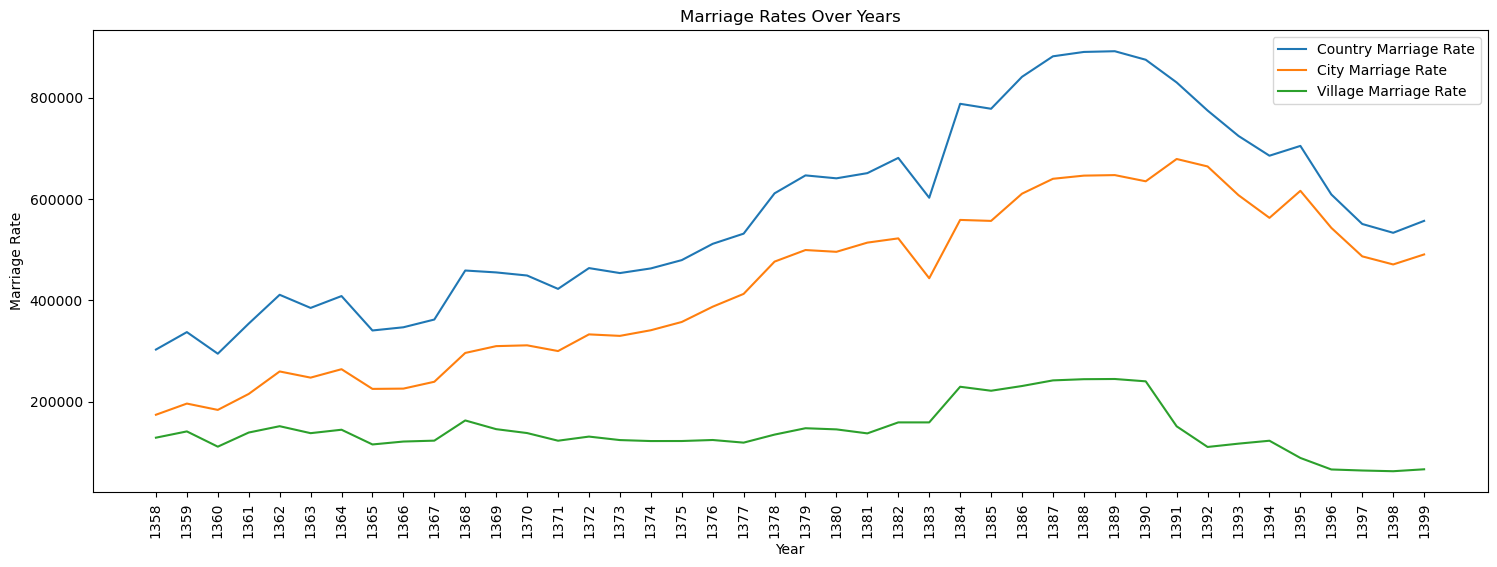

In [283]:
plt.figure(figsize=(18,6))
sns.lineplot(data=DataFrame, x="Year", y="marriage(country)", label="Country Marriage Rate")
sns.lineplot(data=DataFrame, x="Year", y="marriage(city)", label="City Marriage Rate")
sns.lineplot(data=DataFrame, x="Year", y="marriage(village)", label="Village Marriage Rate")

plt.title("Marriage Rates Over Years")
plt.xlabel("Year")
plt.ylabel("Marriage Rate")
plt.xticks(rotation=90)
plt.show()

As expected, most of the population is from cities; therefore, cities play a greater role than villages.

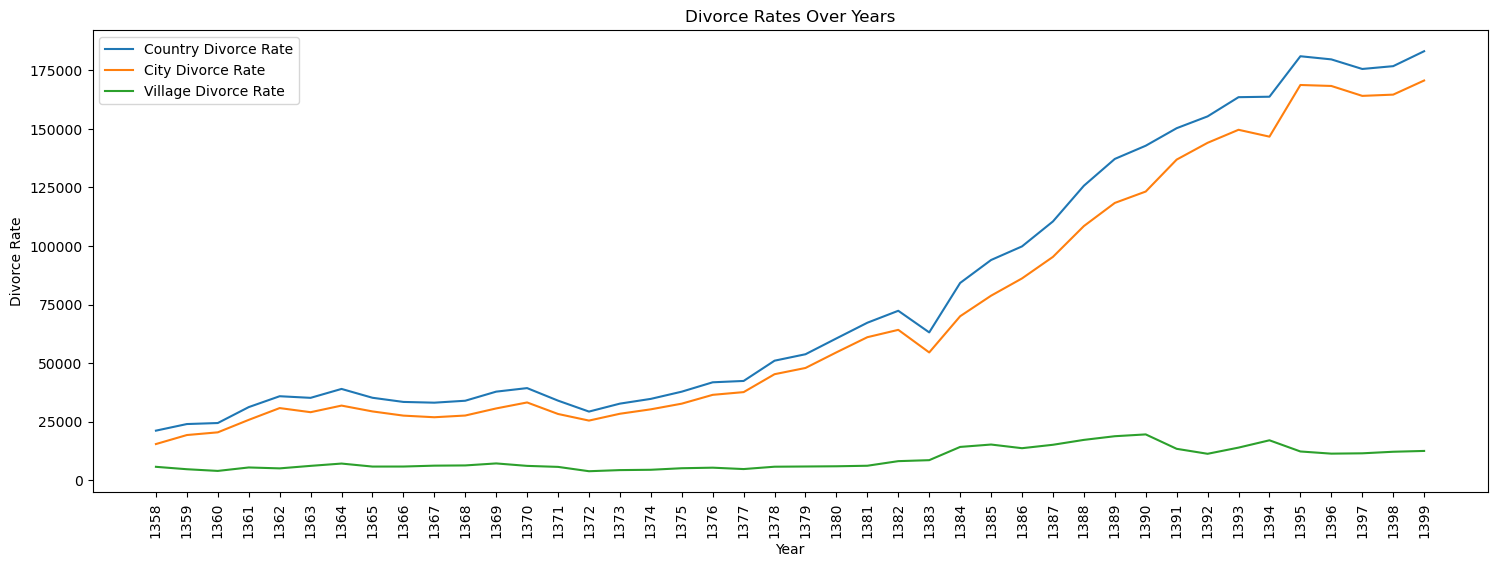

In [284]:
plt.figure(figsize=(18,6))
sns.lineplot(data=DataFrame, x="Year", y="divorce(country)", label="Country Divorce Rate")
sns.lineplot(data=DataFrame, x="Year", y="divorce(city)", label="City Divorce Rate")
sns.lineplot(data=DataFrame, x="Year", y="divorce(village)", label="Village Divorce Rate")

plt.title("Divorce Rates Over Years")
plt.xlabel("Year")
plt.ylabel("Divorce Rate")
plt.xticks(rotation=90)
plt.show()

##### The increase in marriage or divorce? Actually, the divorce rate has been increasing since 1383 (2004). Once again, cities play a greater and more significant role in the divorce rate due to their larger population.

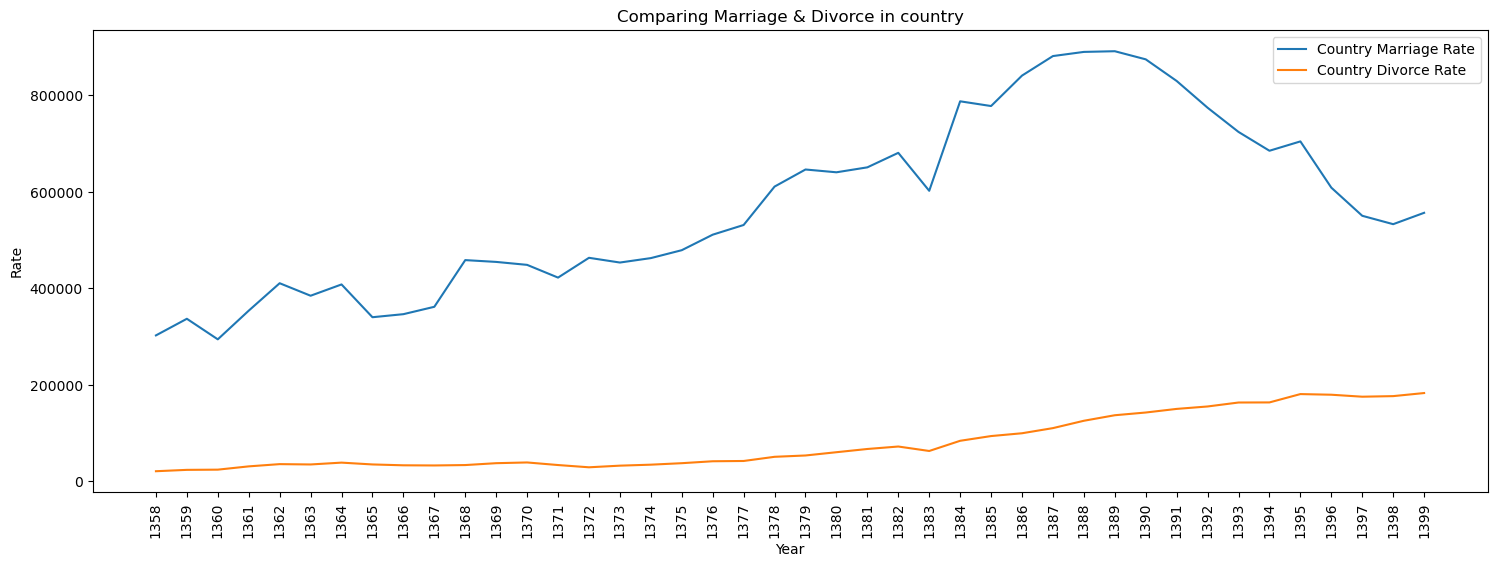

In [285]:
plt.figure(figsize=(18,6))
sns.lineplot(data=DataFrame, x="Year", y="marriage(country)", label="Country Marriage Rate")
sns.lineplot(data=DataFrame, x="Year", y="divorce(country)", label="Country Divorce Rate")

plt.title("Comparing Marriage & Divorce in country")
plt.xlabel("Year")
plt.ylabel("Rate")
plt.xticks(rotation=90)
plt.show()

##### The increase in marriage or divorce? Besides, Marriage rate is significantly reducing since 1394 (2015). So a new question comes to mind:

## Reduction in Marriage rate or Increase in divorce rate? Which plays a bigger role

In [307]:
(DataFrame["marriage(country)"]/DataFrame["divorce(city)"]).mean()

11.11799398556441

Using lineplots the effect of Marriage rate is higher as it plays a bigger role! Almost 11 times more than divorce rate

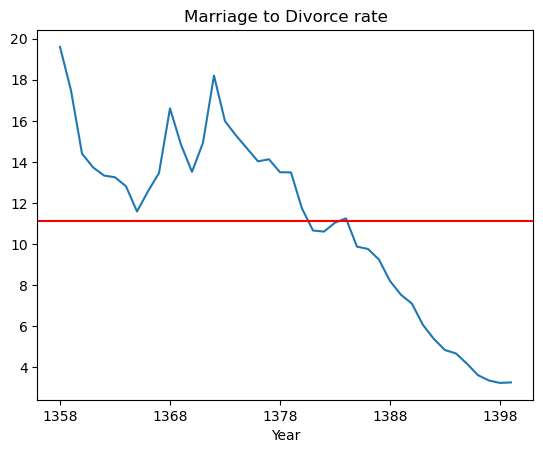

In [319]:
(DataFrame["marriage(country)"]/DataFrame["divorce(city)"]).plot()
plt.title("Marriage to Divorce rate")
plt.axhline(11.11799398556441,color="red")

## Comparing Marriage & Divorce in Cities and Villages

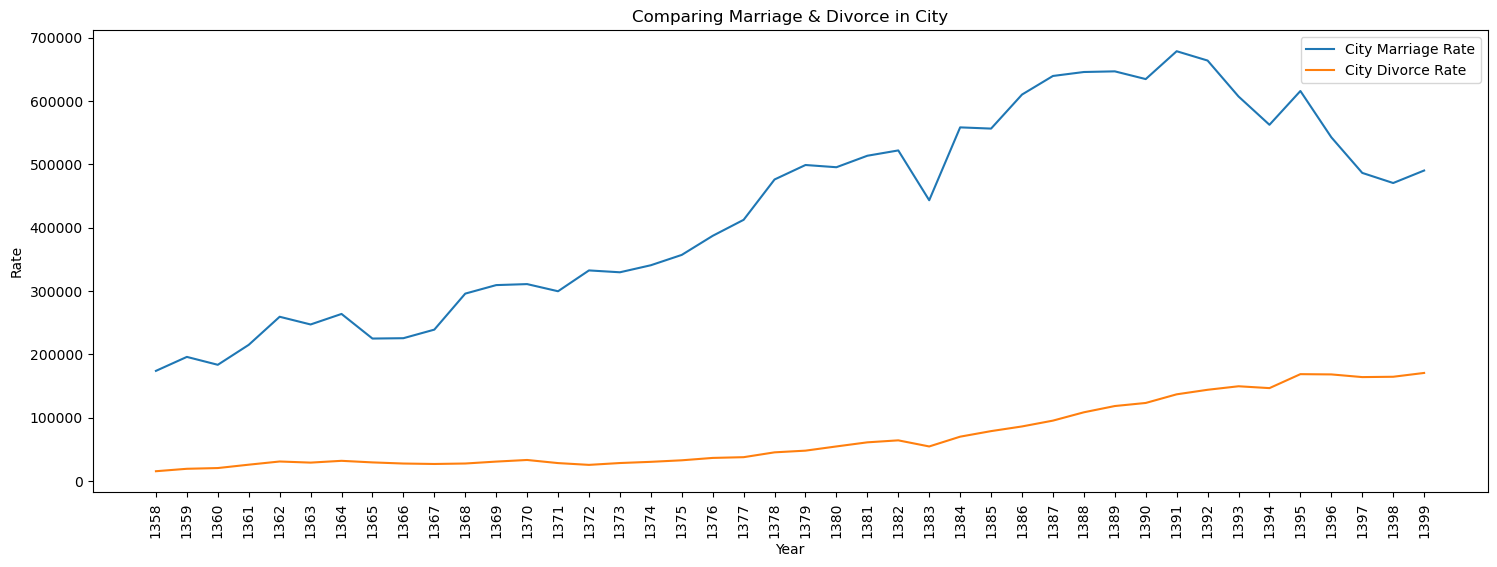

In [286]:
plt.figure(figsize=(18,6))
sns.lineplot(data=DataFrame, x="Year", y="marriage(city)", label="City Marriage Rate")
sns.lineplot(data=DataFrame, x="Year", y="divorce(city)", label="City Divorce Rate")

plt.title("Comparing Marriage & Divorce in City")
plt.xlabel("Year")
plt.ylabel("Rate")
plt.xticks(rotation=90)
plt.show()

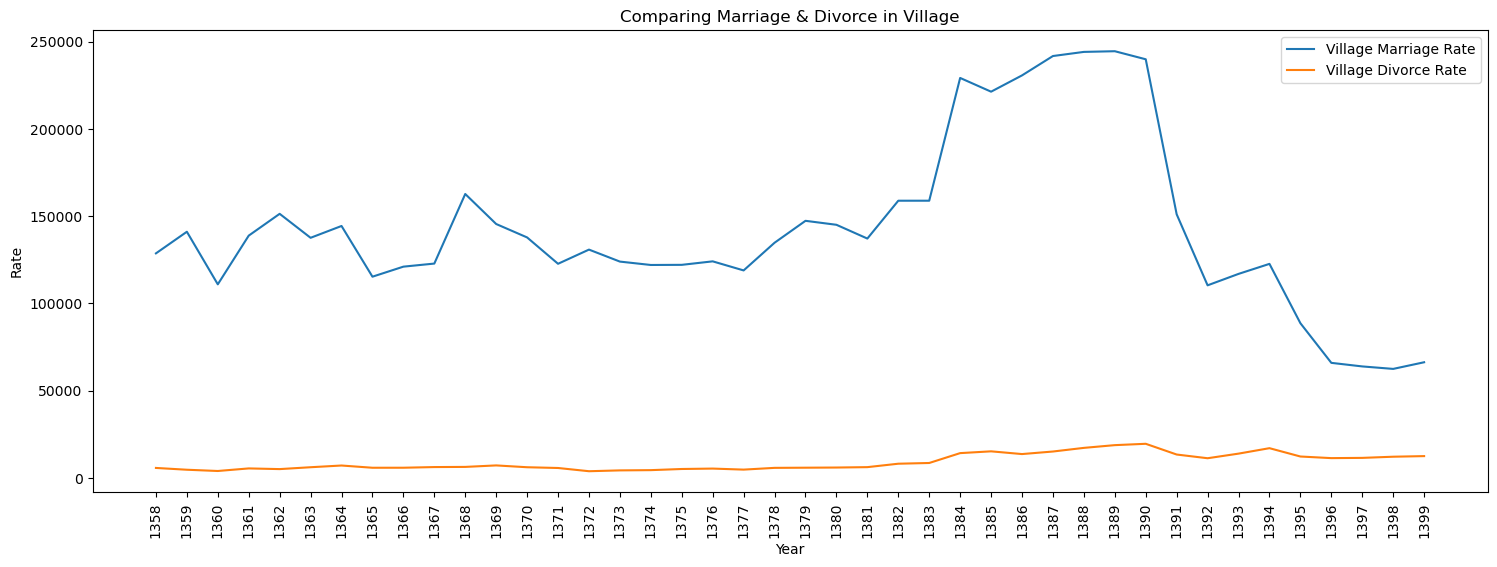

In [287]:
plt.figure(figsize=(18,6))
sns.lineplot(data=DataFrame, x="Year", y="marriage(village)", label="Village Marriage Rate")
sns.lineplot(data=DataFrame, x="Year", y="divorce(village)", label="Village Divorce Rate")

plt.title("Comparing Marriage & Divorce in Village")
plt.xlabel("Year")
plt.ylabel("Rate")
plt.xticks(rotation=90)
plt.show()